<a href="https://colab.research.google.com/github/AkshataJv/Titanic---Machine-Learning-from-Disaster/blob/titanic-eda-featured/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Age
**Conclusion**

- Age is normally distributed.
- 20% of the values are missing.
- There are some outliers.


In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Density'>

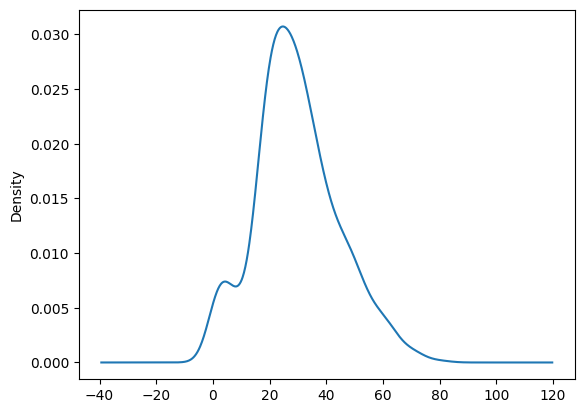

In [ ]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Frequency'>

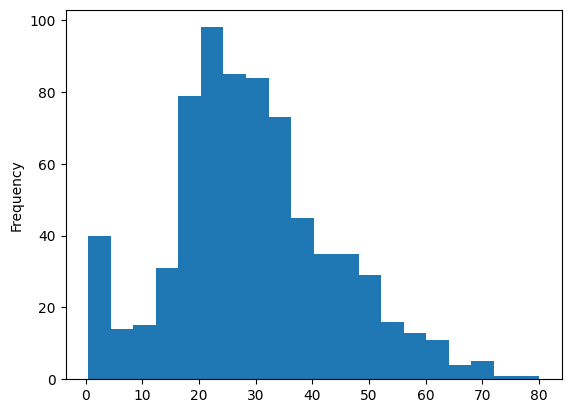

In [ ]:
df['Age'].plot(kind='hist',bins=20)

In [ ]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

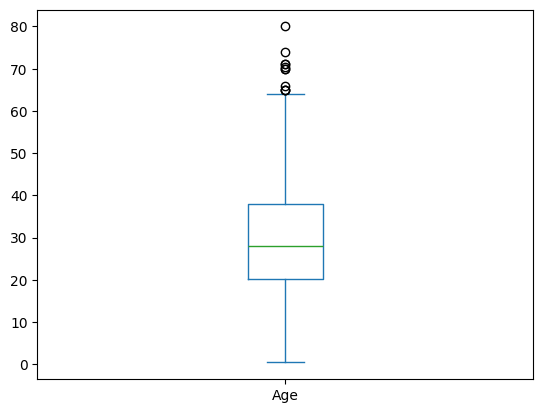

In [ ]:
df['Age'].plot(kind='box')

In [ ]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

## Fare

**Conclusion**
- Data is highly skewed.
- Fare col actually contains the group fare and not the individual face.
- We need to create a new col called individual fare.

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Density'>

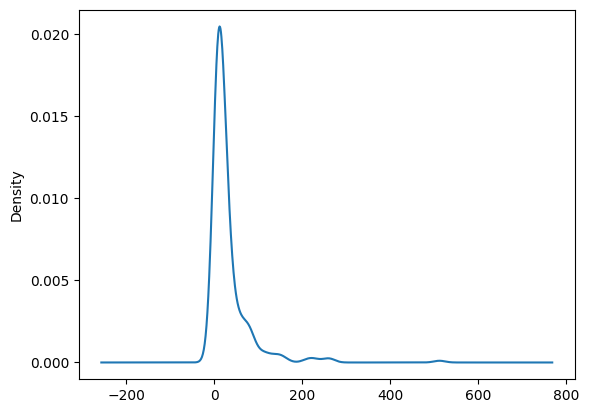

In [ ]:
df['Fare'].plot(kind='kde')

In [ ]:
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: ylabel='Frequency'>

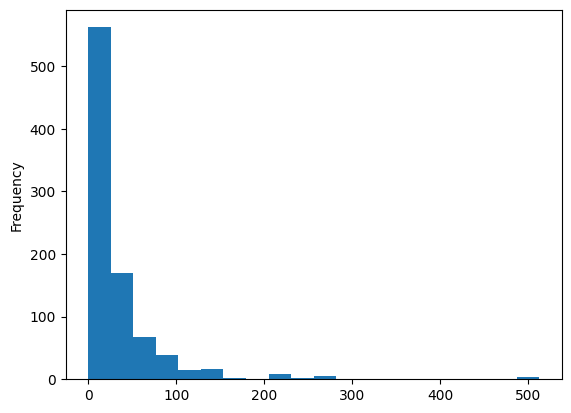

In [ ]:
df['Fare'].plot(kind='hist',bins=20)

<Axes: >

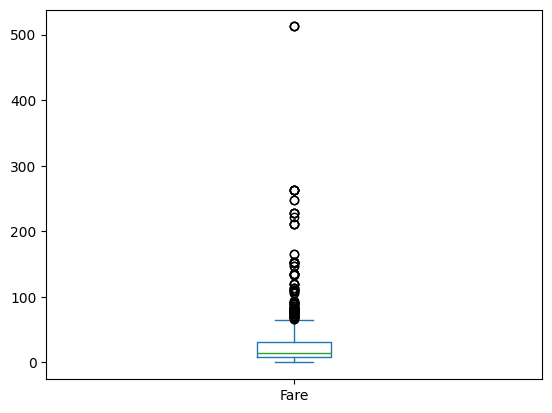

In [ ]:
df['Fare'].plot(kind='box')

In [ ]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
df['Fare'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**
- The dataset has no missing values in the Survived column.
- Around 62% of passengers did not survive, while only 38% survived.
- This indicates that the majority of passengers lost their lives in the Titanic disaster.

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

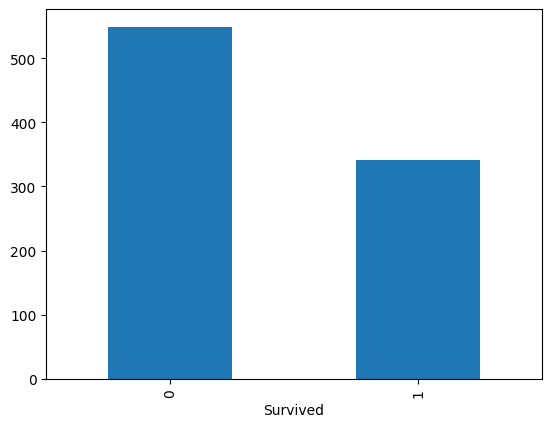

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

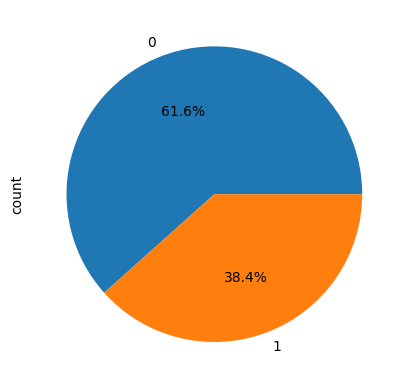

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Survived'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**
- The dataset has no missing values in the Pclass column. Most passengers traveled in 3rd class (~ 55%), while fewer traveled in 1st class (~ 24%) and 2nd class (~21%).
- This shows that the Titanic carried a majority of lower-class passengers compared to upper-class ones.

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass'>

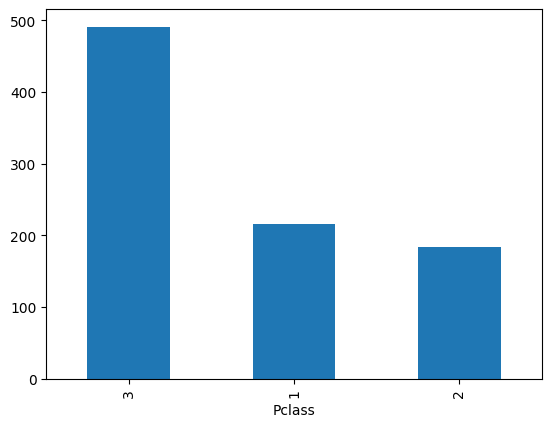

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

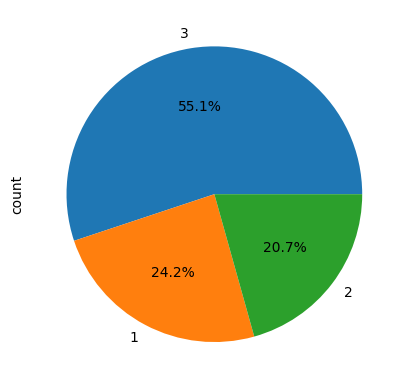

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Pclass'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**
- Parch and SibSp cols can be merged to form a now col call family_size.
- Create a new column id_alone.

In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='Parch'>

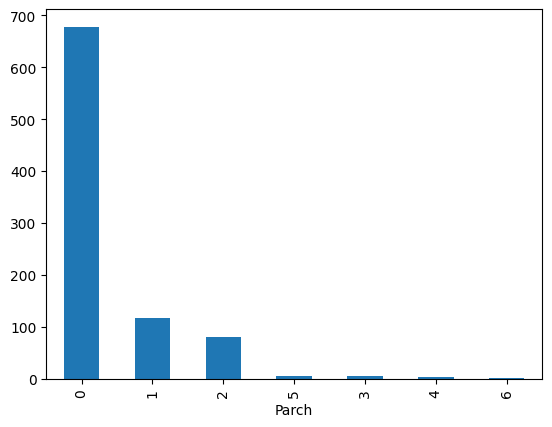

In [ ]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

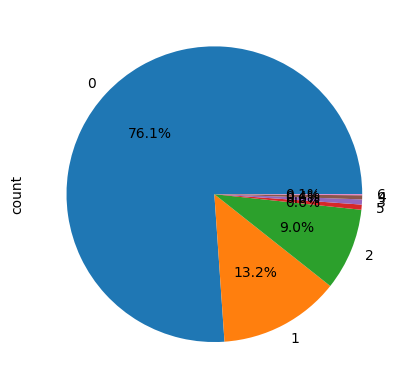

In [ ]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Parch'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**

- The Embarked column has 2 missing values. Majority of passengers (~72%) boarded from Southampton, followed by ~19% from Cherbourg, and ~9% from Queenstown.
- This indicates Southampton was the main departure point for Titanic passengers.

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked'>

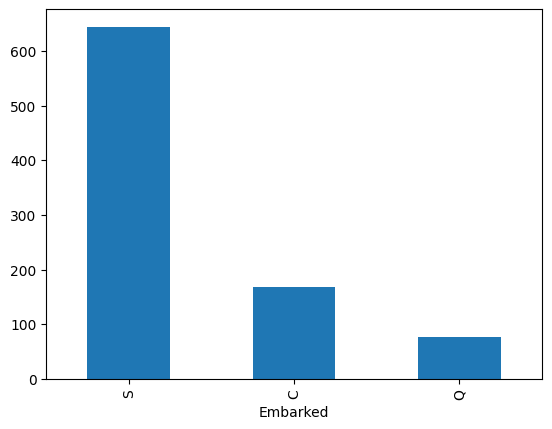

In [ ]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

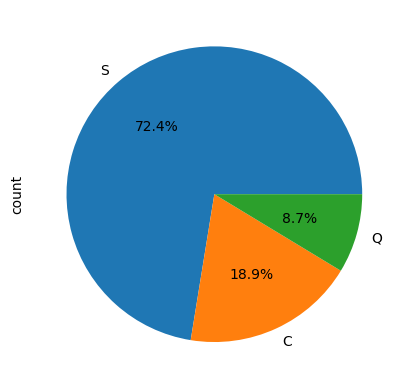

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Embarked'].isnull().sum()

np.int64(2)

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize= 'columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

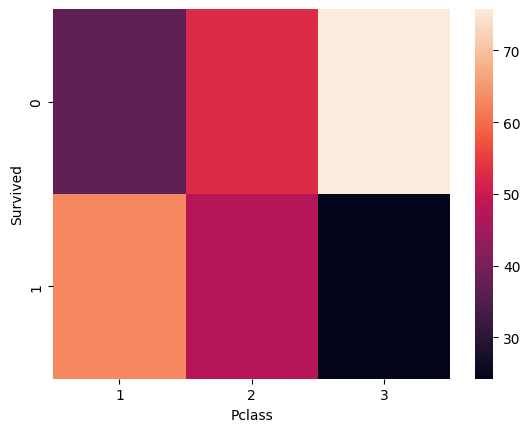

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize= 'columns')*100)

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize= 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize= 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Pclass'],normalize= 'columns')*100

Pclass,1,2,3
Pclass,,,
1,100.0,0.0,0.0
2,0.0,100.0,0.0
3,0.0,0.0,100.0


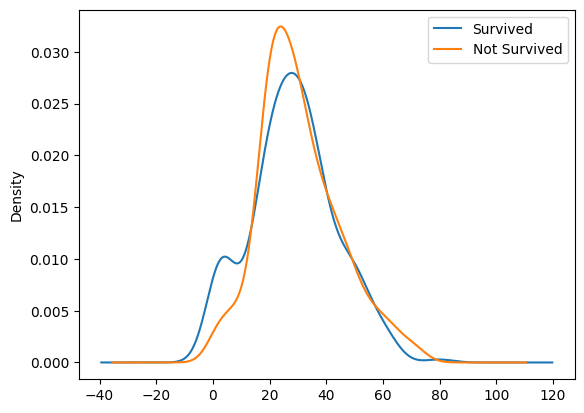

In [ ]:
# Survived & Age
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [ ]:
df[df['Pclass'] == 1]['Age'].mean()

np.float64(38.233440860215055)

In [ ]:
# Featured Engineering on Fare col

In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
69.55/11

6.322727272727272

In [ ]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Mme','Mlle'],'Miss')
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

In [ ]:
df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'U')

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['fare_per_person'] = df['Fare'] / df['family_size']
test_df['FareBin'] = pd.qcut(test_df['fare_per_person'], 4, labels=[1, 2, 3, 4])

In [ ]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['IsChild'] = test_df['Age'].apply(lambda x: 1 if x <= 12 else 0)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 20, 40, 60, 120],
                             labels=['Child', 'Teen', 'Adult', 'Mid', 'Senior'])


In [ ]:
test_df['Pclass_Title'] = test_df['Pclass'].astype(str) + '_' + test_df['Title'].astype(str)

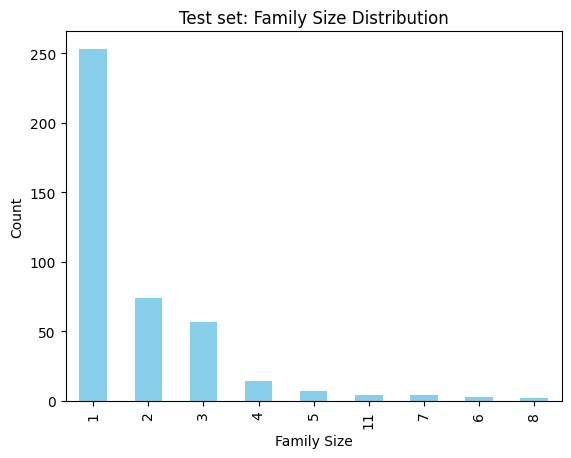

In [ ]:
test_df['family_size'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Test set: Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

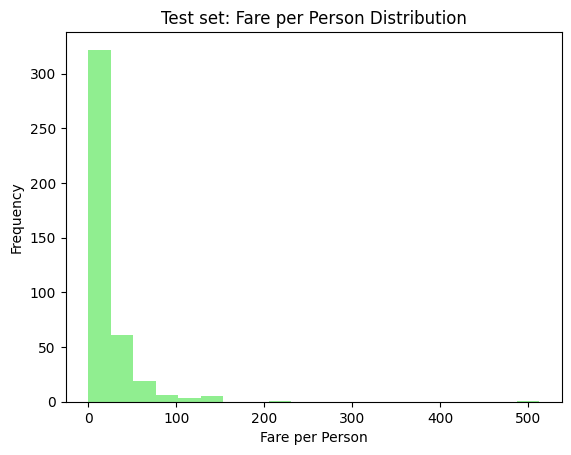

In [ ]:
test_df['fare_per_person'].plot(kind='hist', bins=20, color='lightgreen')
plt.title('Test set: Fare per Person Distribution')
plt.xlabel('Fare per Person')
plt.ylabel('Frequency')
plt.show()

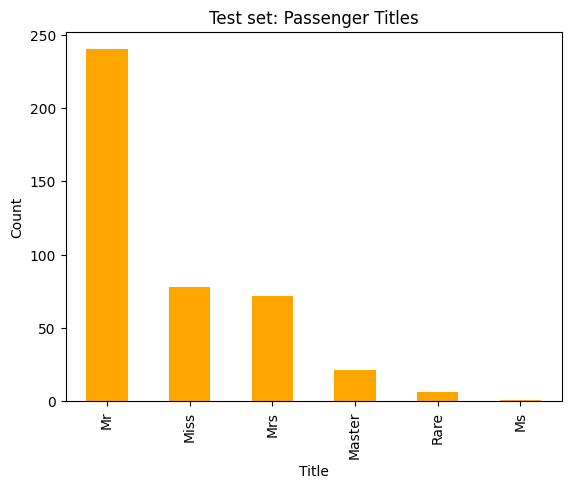

In [ ]:
test_df['Title'].value_counts().plot(kind='bar', color='orange')
plt.title('Test set: Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

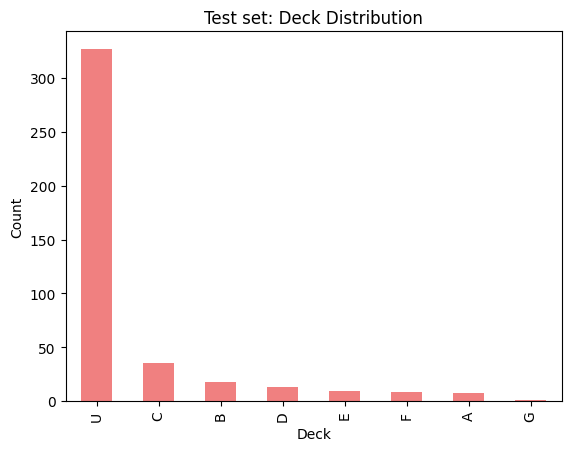

In [ ]:
test_df['Deck'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Test set: Deck Distribution')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

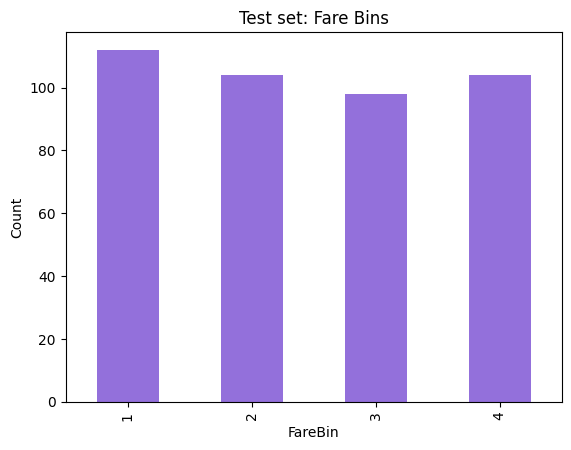

In [ ]:
test_df['FareBin'].value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Test set: Fare Bins')
plt.xlabel('FareBin')
plt.ylabel('Count')
plt.show()

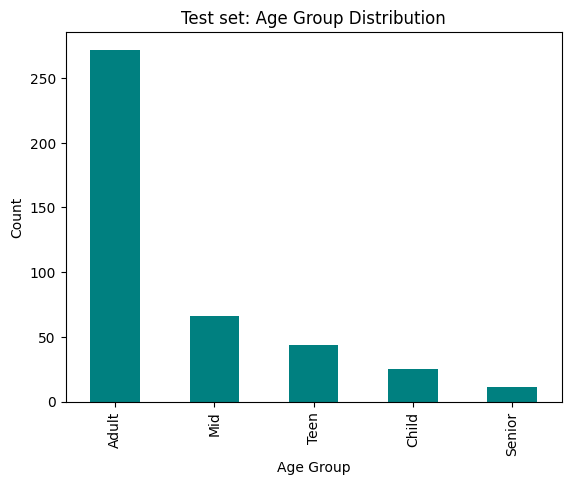

In [ ]:
test_df['AgeGroup'].value_counts().plot(kind='bar', color='teal')
plt.title('Test set: Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

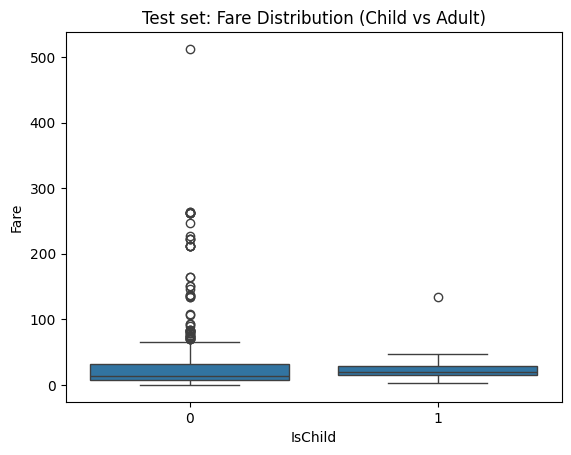

In [ ]:
sns.boxplot(x='IsChild', y='Fare', data=test_df)
plt.title('Test set: Fare Distribution (Child vs Adult)')
plt.show()

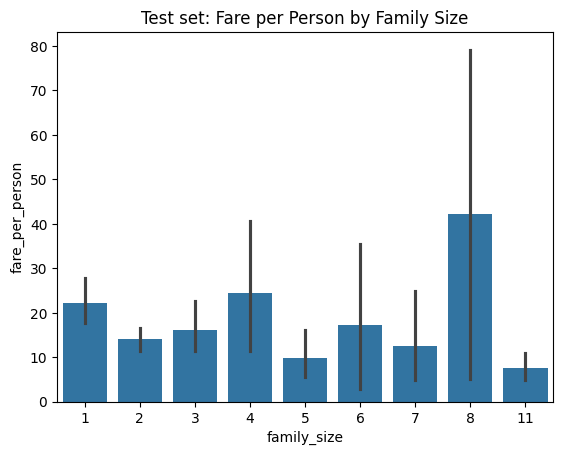

In [ ]:
sns.barplot(x='family_size', y='fare_per_person', data=test_df)
plt.title('Test set: Fare per Person by Family Size')
plt.show()

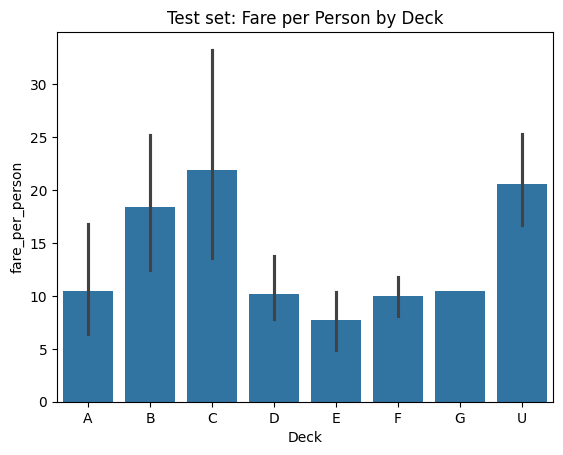

In [ ]:
sns.barplot(x='Deck', y='fare_per_person', data=test_df, order=sorted(test_df['Deck'].unique()))
plt.title('Test set: Fare per Person by Deck')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
features = ['Pclass','Sex','family_size','is_alone','Title','Deck','fare_per_person',
            'FareBin','IsChild','AgeGroup','Pclass_Title','Embarked']

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Mme','Mlle'],'Miss')
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'U')

df['fare_per_person'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)
df['FareBin'] = pd.qcut(df['fare_per_person'], 4, labels=[1,2,3,4])

df['IsChild'] = df['Age'].apply(lambda x: 1 if x <= 12 else 0)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,20,40,60,120], labels=['Child','Teen','Adult','Mid','Senior'])

df['Pclass_Title'] = df['Pclass'].astype(str) + '_' + df['Title'].astype(str)


In [ ]:
features = ['Pclass','Sex','family_size','is_alone','Title','Deck',
            'fare_per_person','FareBin','IsChild','AgeGroup','Pclass_Title','Embarked']

train_model_df = pd.get_dummies(df[features])
test_model_df = pd.get_dummies(test_df[features])

test_model_df = test_model_df.reindex(columns=train_model_df.columns, fill_value=0)

In [ ]:
train_model_df = pd.get_dummies(df[features])
test_model_df = pd.get_dummies(test_df[features])

In [ ]:
test_model_df = test_model_df.reindex(columns=train_model_df.columns, fill_value=0)

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(train_model_df, df['Survived'])

LogisticRegression(max_iter=500)

In [ ]:
test_df['Survived'] = lr.predict(test_model_df)

In [ ]:
submission = test_df[['PassengerId','Survived']]
submission.to_csv('/content/drive/MyDrive/submission.csv', index=False)